In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def distance(x, y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

In [3]:
def fitness(perm):
    total = 0
    for i in range(len(perm) - 1):
        total += distance(perm[i], perm[i+1])
    return total

In [4]:
def crossover(x, y):
    a = np.random.randint(0, len(x)-1)
    b = np.random.randint(a+1, len(x))
    
    # Values that aren't in the cutout
    missing1 = np.array([n for n in y if not n in x[a:b]])
    missing2 = np.array([n for n in x if not n in y[a:b]])
    
    child1 = np.insert(missing1, a, x[a:b], axis=0)
    child2 = np.insert(missing2, a, y[a:b], axis=0)
    
    return child1, child2

In [5]:
def mutation(x):
    pm = 0.01
    
    i = np.random.randint(0, len(x))
    # To prevent i == j:
    j = np.random.choice(np.setdiff1d(range(0, len(x)), i))
    
    # Swap values
    if np.random.rand() < pm:
        x[i], x[j] = x[j], x[i]
    return x

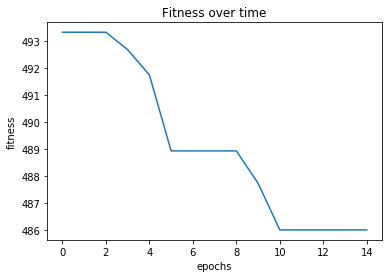

In [17]:
np.random.seed(37)
cities = np.loadtxt("file-tsp.txt")
pop_size = 10
n = 15

avg_fitness = []
org = []

# Random initialization
for i in range(pop_size):
    org.append(np.random.permutation(cities))

for _ in range(n):
    # Sort by fitness
    org = np.array(sorted(org, key=lambda x: fitness(x), reverse=True))
    # Apply crossover and mutation
    child1, child2 = crossover(org[0], org[1])
    child1, child2 = mutation(child1), mutation(child2)
    
    # Replace children with parents if improved
    if fitness(child1) < fitness(org[0]):
        org[0] = child1
    if fitness(child2) < fitness(org[1]):
        org[1] = child2
        
    avg_fitness.append(np.average([fitness(o) for o in org]))

plt.plot(np.arange(len(avg_fitness)), avg_fitness)
plt.title("Fitness over time")
plt.xlabel("epochs")
plt.ylabel("fitness")
plt.show()